# Term Project :: Titanic - Machine Learning from Disaster
##### Path 1 Simple neural network model
---


_จัดทำโดย_
1. *นายสิทธิพงศ์ พรหมปาลิตร* รหัสนักศึกษา 672132003
2. *นายกำชัย บุญศรี*  รหัสนักศึกษา 672132164

ปริญญาโท วิศวกรรมซอฟต์แวร์ วิทยาลัยศิลปะ สื่อ และเทคโนโลยี

In [172]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [173]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')

for x in dataset.index:
    sex = str(dataset.loc[x, "Sex"])
    embarked = str(dataset.loc[x, "Embarked"])
    pclass = str(dataset.loc[x, "Pclass"])
    if ('female' in sex) == True:
        dataset.loc[x, "female"] = 1
        dataset.loc[x, "male"] = 0
    else: 
        dataset.loc[x, "male"] = 1
        dataset.loc[x, "female"] = 0
    if('C' in embarked) == True:
        dataset.loc[x, "Cherbourg"] = 1
        dataset.loc[x, "Queenstown"] = 0
        dataset.loc[x, "Southampton"] = 0
    elif('Q' in embarked) == True:
        dataset.loc[x, "Cherbourg"] = 0
        dataset.loc[x, "Queenstown"] = 1
        dataset.loc[x, "Southampton"] = 0
    elif('S' in embarked) == True:
        dataset.loc[x, "Cherbourg"] = 0
        dataset.loc[x, "Queenstown"] = 0
        dataset.loc[x, "Southampton"] = 1 
    if('1' in pclass) == True:
        dataset.loc[x, "1st"] = 1
        dataset.loc[x, "2nd"] = 0
        dataset.loc[x, "3rd"] = 0
    elif('2' in pclass) == True:
        dataset.loc[x, "1st"] = 0
        dataset.loc[x, "2nd"] = 1
        dataset.loc[x, "3rd"] = 0
    elif('3' in pclass) == True:
        dataset.loc[x, "1st"] = 0
        dataset.loc[x, "2nd"] = 0
        dataset.loc[x, "3rd"] = 1
# print(dataset.head())

cleaned = dataset.dropna().replace('', None)
cleaned.to_csv('cleaned.csv', index=False)
cleaned.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female,Cherbourg,Queenstown,Southampton,1st,2nd,3rd
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [174]:
def split_dataset(dataset, train_frac=0.6):
   train = cleaned.sample(frac=train_frac)
   val = cleaned.drop(train.index)
   return train, val

In [175]:

train, val = split_dataset(cleaned)


xtrain = train[['female', 'male', 'Cherbourg','Queenstown','Southampton','1st','2nd','3rd']]
ytrain = train['Survived']

xtest = val[['female', 'male', 'Cherbourg','Queenstown','Southampton','1st','2nd','3rd']]
ytest = val['Survived']

print(xtrain.shape)
print(ytrain.shape)


(110, 8)
(110,)


In [176]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(8,)))
model.add(tf.keras.layers.Dense(1000, activation='sigmoid'))
model.add(tf.keras.layers.Dense(500, activation='sigmoid'))
model.add(tf.keras.layers.Dense(300, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

print(model.summary())

loss = 'mse'
metric = 'mae'
epochs = 50
model.compile(loss=loss, optimizer='sgd', metrics=[metric])
history = model.fit(xtrain, ytrain, epochs=epochs, batch_size=64, verbose=1, validation_data=(xtest, ytest))



Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 1000)              9000      
                                                                 
 dense_126 (Dense)           (None, 500)               500500    
                                                                 
 dense_127 (Dense)           (None, 300)               150300    
                                                                 
 dense_128 (Dense)           (None, 100)               30100     
                                                                 
 dense_129 (Dense)           (None, 2)                 202       
                                                                 
Total params: 690,102
Trainable params: 690,102
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
2/2 [==========================

In [177]:
_, accuracy = model.evaluate(xtrain, ytrain)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.2260 - mae: 0.4534
Accuracy: 45.34


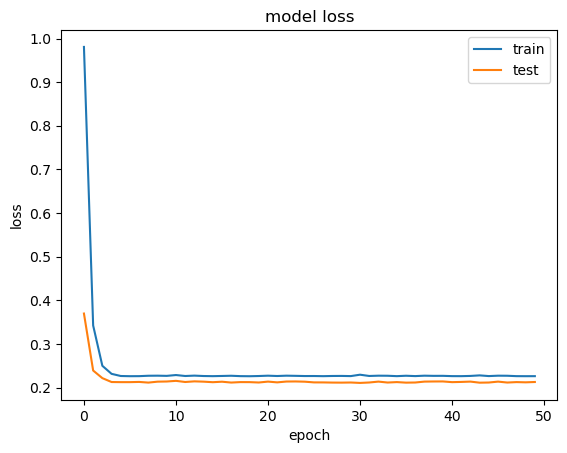

In [178]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


In [179]:
predictions = model.predict(xtest)

print(predictions)

output = pd.DataFrame({'PassengerId': cleaned.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

3/3 [==============================] - 0s 1ms/step
[[0.650785   0.6495387 ]
 [0.6503173  0.6494266 ]
 [0.65003544 0.64960486]
 [0.6502641  0.6497199 ]
 [0.6511655  0.64970875]
 [0.65003544 0.64960486]
 [0.65003544 0.64960486]
 [0.6502641  0.6497199 ]
 [0.6511655  0.64970875]
 [0.6508841  0.649888  ]
 [0.6502641  0.6497199 ]
 [0.6503173  0.6494266 ]
 [0.6502641  0.6497199 ]
 [0.6503173  0.6494266 ]
 [0.6511105  0.65000296]
 [0.6511105  0.65000296]
 [0.6502641  0.6497199 ]
 [0.65003544 0.64960486]
 [0.6508841  0.649888  ]
 [0.6508841  0.649888  ]
 [0.6508841  0.649888  ]
 [0.6502641  0.6497199 ]
 [0.6511105  0.65000296]
 [0.6511105  0.65000296]
 [0.6511105  0.65000296]
 [0.6508841  0.649888  ]
 [0.6511105  0.65000296]
 [0.6511655  0.64970875]
 [0.6511105  0.65000296]
 [0.65003544 0.64960486]
 [0.65003544 0.64960486]
 [0.6511655  0.64970875]
 [0.6508841  0.649888  ]
 [0.6511105  0.65000296]
 [0.6511105  0.65000296]
 [0.65003544 0.64960486]
 [0.65003544 0.64960486]
 [0.65003544 0.64960486]

ValueError: Per-column arrays must each be 1-dimensional